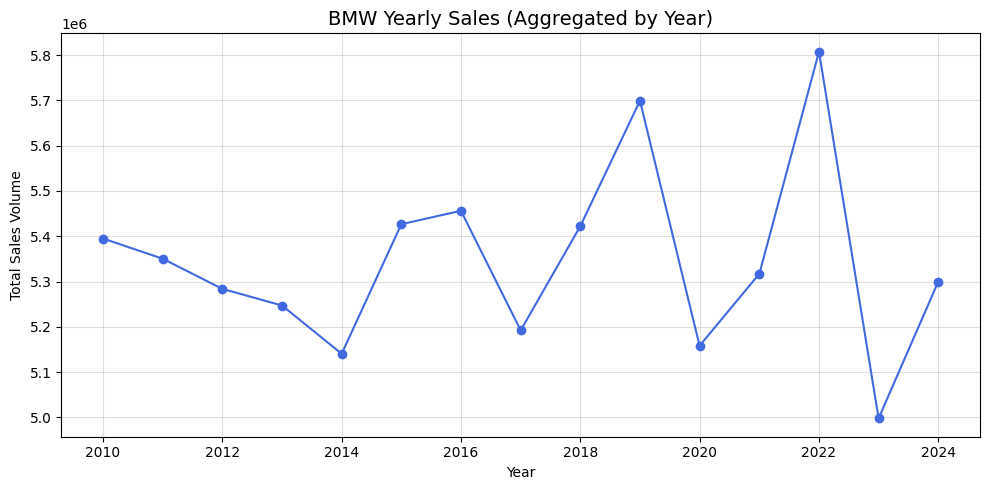

 Finding best ARIMA order (with differencing d=1)...

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=307.512, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=309.462, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=309.562, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=305.564, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=311.283, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.365 seconds

Best ARIMA Order Found: (0, 1, 0)

 Root Mean Squared Error (RMSE): 338173.39


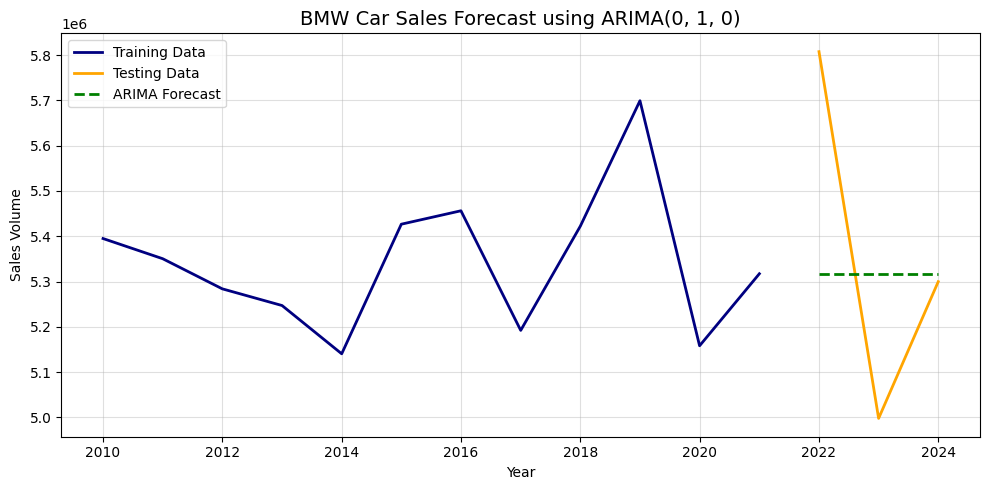

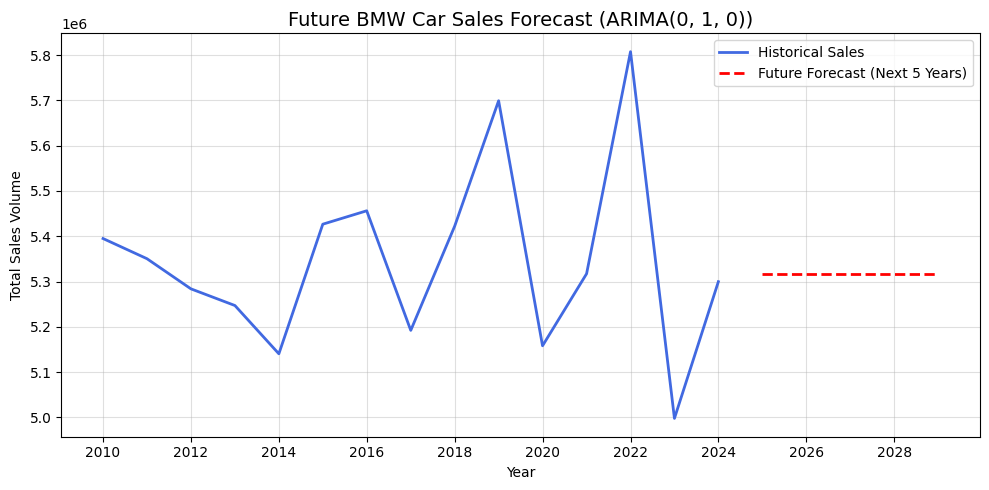

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("/content/BMW_Car_Sales_Classification.csv")

# Convert 'Year' to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Aggregate yearly total sales
yearly_sales = data.groupby(data['Year'].dt.year)['Sales_Volume'].sum().reset_index()

# Set proper datetime index
yearly_sales['Year'] = pd.to_datetime(yearly_sales['Year'], format='%Y')
yearly_sales.set_index('Year', inplace=True)

# Sort by year (important for time series)
yearly_sales.sort_index(inplace=True)

# Plot raw yearly data
plt.figure(figsize=(10,5))
plt.plot(yearly_sales['Sales_Volume'], marker='o', color='royalblue')
plt.title('BMW Yearly Sales (Aggregated by Year)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

#  Train-test split (80-20)
train_size = int(len(yearly_sales) * 0.8)
train = yearly_sales['Sales_Volume'][:train_size]
test = yearly_sales['Sales_Volume'][train_size:]

# Use Auto ARIMA to find the best (p,d,q)
print(" Finding best ARIMA order (with differencing d=1)...\n")

auto_model = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=1,                    # Force first differencing
    seasonal=False,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

print("\nBest ARIMA Order Found:", auto_model.order)

#  Fit ARIMA with best order
model = ARIMA(train, order=auto_model.order)
fitted_model = model.fit()

# Forecast for the test period
forecast = fitted_model.forecast(steps=len(test))
forecast = pd.Series(forecast.values, index=test.index)

#  RMSE Calculation (with NaN protection)
valid_idx = test.dropna().index.intersection(forecast.dropna().index)
if len(valid_idx) > 0:
    rmse = np.sqrt(mean_squared_error(test.loc[valid_idx], forecast.loc[valid_idx]))
    print(f"\n Root Mean Squared Error (RMSE): {rmse:.2f}")
else:
    print("\n Warning: No overlapping samples found for RMSE calculation.")

#  Visualization
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data', color='navy', linewidth=2)
plt.plot(test, label='Testing Data', color='orange', linewidth=2)
plt.plot(forecast, label='ARIMA Forecast', color='green', linestyle='--', linewidth=2)
plt.title(f'BMW Car Sales Forecast using ARIMA{auto_model.order}', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

#  Future Forecast (next 5 years)
future_steps = 5
future_forecast = fitted_model.forecast(steps=future_steps)
future_years = pd.date_range(start=yearly_sales.index[-1] + pd.offsets.YearBegin(), periods=future_steps, freq='YS')
future_forecast = pd.Series(future_forecast.values, index=future_years)

plt.figure(figsize=(10,5))
plt.plot(yearly_sales['Sales_Volume'], label='Historical Sales', color='royalblue', linewidth=2)
plt.plot(future_forecast, label='Future Forecast (Next 5 Years)', color='red', linestyle='--', linewidth=2)
plt.title(f'Future BMW Car Sales Forecast (ARIMA{auto_model.order})', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
! pip install pmdarima

In [2]:

!pip install numpy==1.26.4
!pip install pmdarima==2.0.4



  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
